# Titanic Data Analysis

**Author:** Mominur Rahman

**Date:** 2021-05-11

**Version:** 1.0

**Dataset:** Titanic Dataset

**Language:** Python

**Portfolio:** https://mominur.dev/

**Github Repository:** https://github.com/mominurr/Titanic-Data-Analysis

**LinKedin Profile:** https://www.linkedin.com/in/mominur--rahman/

**Purpose:** To perform data analysis on the Titanic dataset and identify the factors that contributed to the survival of passengers.

**Project Overview:**

The Titanic sank after hitting an iceberg on its maiden voyage in 1912. The ship had only 2224 passengers aboard and lost half of them. The Titanic dataset contains information about the passengers aboard the ship including their age, sex, class, fare, etc. The goal of this project is to perform data analysis on the Titanic dataset and identify the factors that contributed to the survival of passengers.


### Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### load data sets

In [225]:
# load data sets
df=pd.read_csv("data.csv")

In [226]:
print("row and column : ",df.shape)

row and column :  (1309, 12)


### Display the first 10 rows of the dataset to understand its structure

In [227]:
# Display the first 10 rows of the dataset to understand its structure
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Titanic Dataset - Data Header Definitions

This section explains what each column in the Titanic dataset represents:

| **Column Name**   | **Description**                                                                 | **Key**                                               |
|-------------------|---------------------------------------------------------------------------------|-------------------------------------------------------|
| **PassengerId**    | A unique identifier assigned to each passenger.                                | -                                                     |
| **Survived**       | Indicates whether the passenger survived or not.                               | 0 = No, 1 = Yes                                       |
| **Pclass**         | Passenger's ticket class, a proxy for socio-economic status (SES).              | 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)    |
| **Name**           | Full name of the passenger.                                                    | -                                                     |
| **Sex**            | Gender of the passenger.                                                       | Male, Female                                          |
| **Age**            | Age of the passenger in years. Fractional if less than 1. Estimated ages appear as xx.5. | -                                                     |
| **SibSp**          | Number of siblings or spouses aboard the Titanic.                              | Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (excluding fiancés and mistresses) |
| **Parch**          | Number of parents or children aboard the Titanic.                              | Parent = mother, father. Child = son, daughter, stepson, stepdaughter. |
| **Ticket**         | The ticket number assigned to the passenger.                                   | -                                                     |
| **Fare**           | The fare paid by the passenger for their ticket.                               | -                                                     |
| **Cabin**          | The cabin number assigned to the passenger.              | -                                                     |
| **Embarked**       | The port where passengers boarded the Titanic.                              | C = Cherbourg, Q = Queenstown, S = Southampton        |


#### Additional Notes:
- **Pclass** acts as a socio-economic status (SES) indicator: 
  - 1st = Upper class (wealthy)
  - 2nd = Middle class
  - 3rd = Lower class (working class)
  
- **SibSp** describes the family structure:  
  - Sibling includes brothers, sisters, step-siblings.
  - Spouse includes husbands and wives (but not fiancés or mistresses).

- **Parch** provides insight into family groups:
  - Parent includes mothers and fathers.
  - Child includes daughters, sons, stepchildren.

Some passengers, particularly children, may have traveled with a nanny or alone, which results in **Parch = 0** for them.


### Data Cleaning

#### checking the data types of the columns in the dataset using the `info()` method.

In [228]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


#### Converting all object type data to string type data

In [229]:
# Converting all object type data to string type data
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

# Checking the data types again to ensure the conversion
df.dtypes


PassengerId             int64
Survived                int64
Pclass                  int64
Name           string[python]
Sex            string[python]
Age                   float64
SibSp                   int64
Parch                   int64
Ticket         string[python]
Fare                  float64
Cabin          string[python]
Embarked       string[python]
dtype: object

#### Checking for missing values in each column

In [230]:
# Checking for missing values in each column
# This helps us to identify which columns need attention for missing data.

df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### **Drop the unnecessary columns** - PassengerId, Ticket, Cabin

In [231]:
# drop the unnecessary columns - PassengerId, Ticket, Cabin
df.drop(['PassengerId','Ticket', 'Cabin'], axis=1, inplace=True)

# after removing columns the datasets
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Handeling missing values

In [232]:
# Handle missing values in 'Age' by filling them with the median value.
# Median is chosen as it is less affected by outliers compared to the mean.
df['Age'] = df['Age'].fillna(df['Age'].median())

# Handle missing values in 'Embarked' by dropping rows where the 'Embarked' column is missing.
# 'Embarked' has few missing values, so dropping these rows will not heavily affect the analysis.
df.dropna(subset=['Embarked'], inplace=True)

# Handle missing values in "Fare" by droping rows where the "Fare" column is missing.
# "Fare" has few missing values, so dropping these rows will not heavily affect the analysis.
df.dropna(subset=["Fare"],inplace=True)


# remove duplicates values
df.drop_duplicates(inplace=True)

# after handeling missing values checking row and column number
print("after removing duplicates rows and missing values, row and column number is : ",df.shape)

# after handeling missing values checking missing values in each column
print("after handeling missing values checking missing values in each column:\n")
df.isnull().sum()


after removing duplicates rows and missing values, row and column number is :  (1306, 9)
after handeling missing values checking missing values in each column:



Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Creating a new column for the passenger's age group ("Child," "Adult," "Senior") based on the 'Age' column

- **Age Classification Criteria:**
- **Child**: Age < 18
- **Adult**: Age >= 18 and Age < 65
- **Senior**: Age >= 65

In [233]:
# Create a new column for the passenger's age group ("Child," "Adult," "Senior") based on the 'Age' column
# Define a function to classify age groups
def age_group(age):
    if age < 18:
        return 'Child'
    elif age>=18 and age<65:
        return 'Adult'
    else:
        return 'Senior'

# Create a new column for age group
df['AgeGroup'] = df['Age'].apply(age_group)


# Display the DataFrame
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,Adult
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Adult
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Child
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Adult
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Child


### Data Exploratory Data Analysis

#### Providing a Summary of the Dataset

In [234]:
# Use descriptive statistics to summarize the dataset.
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,0.376723,2.296325,29.448063,0.50000,0.385911,33.223956
std,0.484750,0.837037,12.857848,1.04258,0.866357,51.765986
min,0.000000,1.000000,0.170000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.00000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.00000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.00000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.00000,9.000000,512.329200


##### Interpretation:

- **Survival Rate**: The mean survival rate is approximately 37.7%, indicating that about one-third of the passengers survived.
- **Passenger Class**: The average passenger class is around 2.3, suggesting a mix of higher, middle and lower-class passengers.
- **Age Distribution**: The average age of passengers is about 29.5 years, with a wide range from infants (0.17 years) to seniors (80 years).
- **Family Size**: The average number of siblings/spouses (SibSp) is 0.50, indicating that many passengers traveled alone.
- **Fare**: The mean fare is approximately 33.22, with a maximum fare of 512.33, highlighting the significant variability in ticket prices.

This summary provides a quick overview of the dataset's characteristics, helping to understand the demographics and conditions of the passengers.

#### Visualize the Distribution of Passengers by Gender

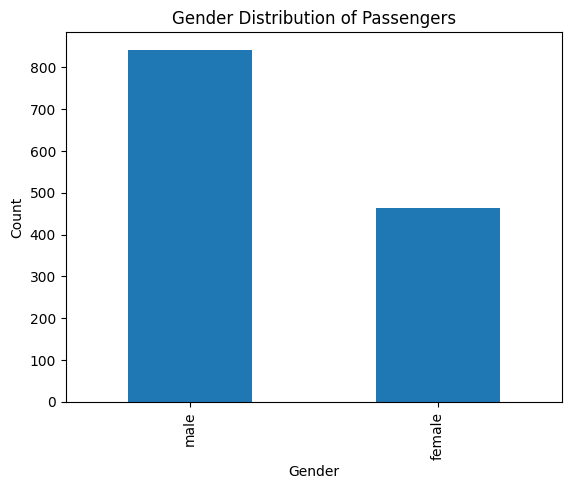

In [235]:
# Bar plot to show the distribution of passengers based on gender.
df["Sex"].value_counts().plot(kind="bar")
plt.title('Gender Distribution of Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



**The visualization displays the distribution of passengers categorized by gender. Key observations include:**

- **Gender Ratio**: The majority of passengers are male, with a significant but smaller proportion of female passengers.
- **Overall Representation**: The male-to-female ratio indicates a male-dominated passenger list, reflecting social norms of the era.
- **Implications for Survival**: Understanding the gender distribution is crucial for analyzing survival rates, as females typically exhibited higher survival rates.

This visualization provides a straightforward overview of the gender demographics among the passengers, setting the stage for deeper analysis of survival outcomes.


#### Creating a histogram for the age distribution

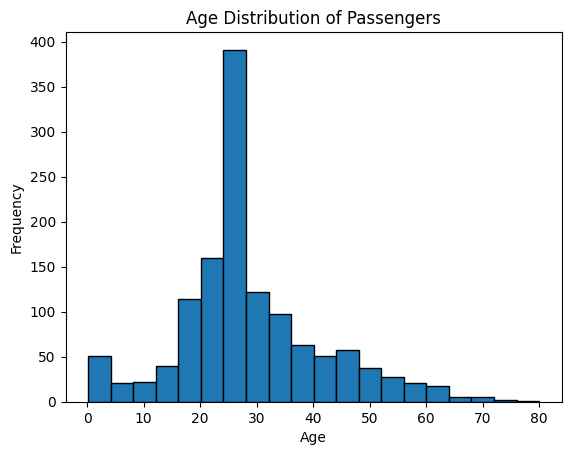

In [236]:
# Creating a histogram to show the age distribution of passengers.
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**The histogram illustrates the age distribution of passengers on the voyage. Key observations include:**

- **Age Range**: The histogram reveals a broad range of ages among passengers, from infants to seniors.
- **Peaks in Distribution**: There are notable peaks in the distribution, particularly among young adults and children, indicating a significant presence of these age groups.
- **Lower Representation of Seniors**: The number of senior passengers is relatively low, suggesting that younger demographics comprised the majority of the passenger list.

This histogram provides a clear visual representation of the age demographics, highlighting the diverse age composition of the passengers.

#### Visualize the Survival Rate by Gender and Class

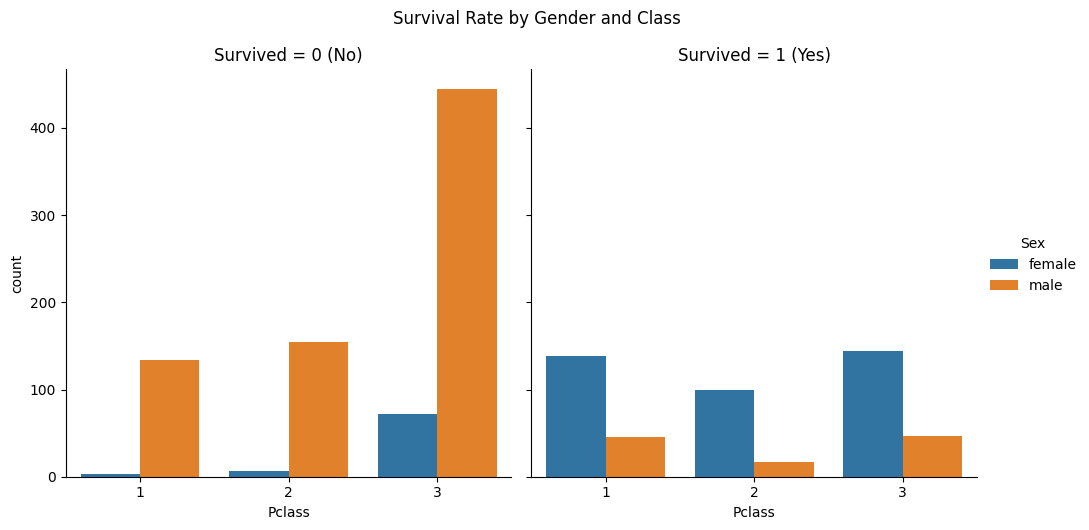

In [237]:
# Create the catplot
g = sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', col_order=[0, 1])

# Update the titles of the subplots
g.axes[0][0].set_title('Survived = 0 (No)')
g.axes[0][1].set_title('Survived = 1 (Yes)')

# Set a super title for the entire plot
plt.suptitle('Survival Rate by Gender and Class', y=1.05)

# Show the plot
plt.show()



**The visualization depicts the survival rates of passengers based on gender and class. Key insights include:**

- **Gender Disparity**: Female passengers consistently exhibit higher survival rates compared to male passengers across all classes.
- **Class Influence**: First-class passengers have the highest survival rates overall. The survival rate in second class is notably lower than both first and third classes, contrary to initial observations.
- **Nearly Equal Survival Rates**: The survival rates for male passengers in first and third classes are nearly equal, while female passengers in third class show a significant drop compared to those in first class.
- **Males**: Survival rates are generally lower for males in all age groups.

This visualization emphasizes the critical role of gender and class in determining survival outcomes during the voyage, highlighting the unique challenges faced by passengers in different classes.


#### Visualize of passenger by age group and sex

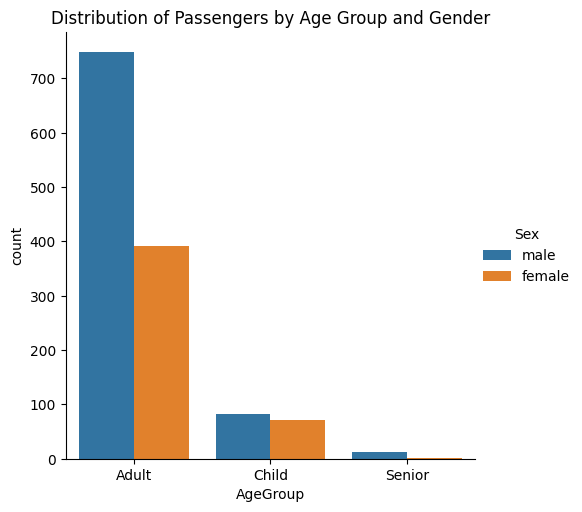

In [238]:
# Create a count plot to show the distribution of passengers by age group and sex
sns.catplot(x='AgeGroup', hue='Sex', data=df, kind='count')

# Set the title of the plot
plt.title('Distribution of Passengers by Age Group and Gender')

# Show the plot
plt.show()


**The visualization illustrates the distribution of passengers categorized by age group and sex. Key observations include:**

- **Age Group Distribution**: The majority of passengers fall within the adult age group, followed by children and then seniors.
- **Gender Representation**: Both male and female passengers are present across all age groups, but the number of male passengers is generally higher, especially in the adult category.
- **Child Representation**: A notable number of children, particularly females, indicates a significant presence of young passengers on board.
##### Age Classification Criteria:
- **Child**: Age < 18
- **Adult**: Age >= 18 and Age < 65
- **Senior**: Age >= 65

This visualization effectively highlights the demographic makeup of the passenger list, revealing insights into the composition of gender and age during the journey.


#### Visualize Survival Rate by Age Group and Gender

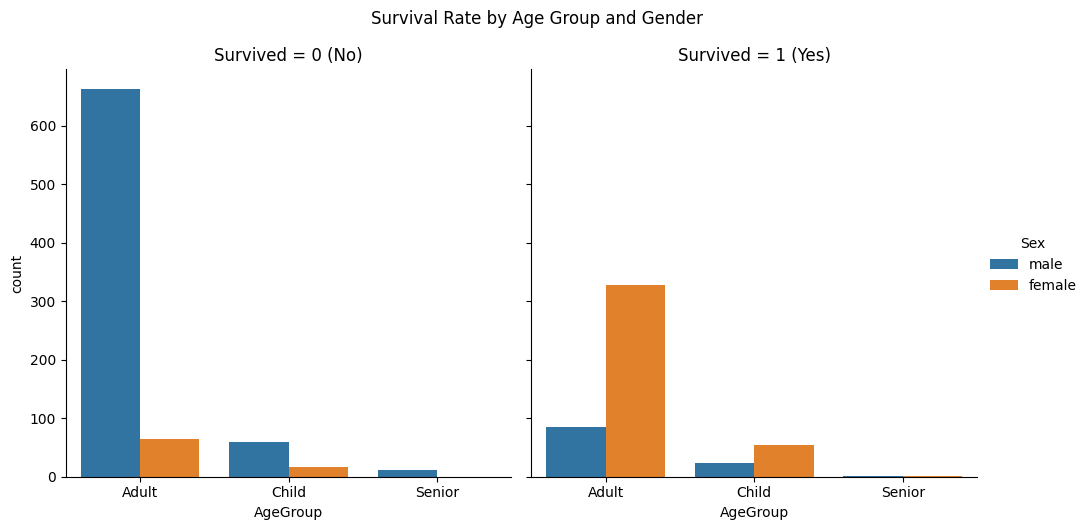

In [239]:
# Create the catplot
g = sns.catplot(x='AgeGroup', hue='Sex', col='Survived', data=df, kind='count', col_order=[0, 1])

# Update the titles of the subplots
g.axes[0][0].set_title('Survived = 0 (No)')
g.axes[0][1].set_title('Survived = 1 (Yes)')

# Set a super title for the entire plot
plt.suptitle('Survival Rate by Age Group and Gender', y=1.05)

# Show the plot
plt.show()



**The visualization displays the survival rates across different age groups categorized by gender. Key insights include:**

- **Children**: Higher survival rates for both males and females, with females typically showing better survival chances.
- **Adults**: Females have significantly higher survival rates compared to males.
- **Seniors**: Very few data points, but males have notably low survival rates compared to females.
- **Males**: Survival rates are generally lower for males in all age groups.

This visualization highlights the disparity in survival rates based on gender and age, reflecting societal norms and behaviors during the disaster.


### Basic Statistical Analysis:

#### Calculate Mean, Median, and Mode for 'Fare' and 'Age'**

In [240]:
# Calculate mean, median, and mode for 'Fare'
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
# Mode returns a series, so we take the first value
fare_mode = df['Fare'].mode()[0]

# Calculate mean, median, and mode for 'Age'
age_mean = df['Age'].mean()
age_median = df['Age'].median()
# Mode returns a series, so we take the first value
age_mode = df['Age'].mode()[0]

# Print the results
print(f"Fare - Mean: {fare_mean}, Median: {fare_median}, Mode: {fare_mode}")
print(f"Age - Mean: {age_mean}, Median: {age_median}, Mode: {age_mode}")


Fare - Mean: 33.22395627871363, Median: 14.4542, Mode: 8.05
Age - Mean: 29.448062787136294, Median: 28.0, Mode: 28.0


##### Summary of Fare and Age Statistics

##### Fare:
- **Mean**: 33.22
  - The average fare paid by passengers was 33.22.
- **Median**: 14.45
  - Half of the passengers paid less than or equal to 14.45, and half paid more.
- **Mode**: 8.05
  - The most common fare paid by passengers was 8.05.

##### Age:
- **Mean**: 29.45
  - The average age of passengers was 29.45 years.
- **Median**: 28.0
  - Half of the passengers were younger than 28 years old, and half were older.
- **Mode**: 28.0
  - The most frequently occurring age among passengers was 28 years.



#### T-test for Survival Rate Based on Gender

- t_stat: The t-statistic, which quantifies the difference between the groups
- p_value: The p-value, which tells us the probability that the observed difference happened by chance.

In [241]:
# Separate the survival data by gender to perform a t-test
survived_male = df[df['Sex'] == 'male']['Survived']
survived_female = df[df['Sex'] == 'female']['Survived']

# Perform a t-test to check if the difference in survival rate between genders
t_stat, p_value = stats.ttest_ind(survived_male, survived_female)

# Print the t-test results
print(f"T-test Result: t-statistic = {t_stat}, p-value = {p_value}")



T-test Result: t-statistic = -34.17873052515724, p-value = 2.391994912535409e-183



##### T-Test Results Interpretation

- ##### t-statistic:
    - The negative value of the t-statistic **(-34.18)** indicates that the survival rate for **females** is significantly higher than that for **males**.
    - The large magnitude of the t-statistic (34.18) shows that the difference between the survival rates of males and females is substantial.

- ##### p-value:
    - The p-value is extremely small (**2.39e-183**), which is effectively zero.
    - Since this p-value is far smaller than the typical significance level of **0.05**, it means that the observed difference in survival rates between males and females is **highly statistically significant**.
    - This indicates that there is almost no probability that the difference in survival rates happened by random chance.


#### Statistical Analysis of Survival Rate by Age Group

In [242]:
# Statistical analysis of age groups
age_group_stats = df.groupby('AgeGroup').agg(
    Count=('Age', 'size'),
    Survival_Rate=('Survived', 'mean'),
    Mean_Age=('Age', 'mean'),
    Median_Age=('Age', 'median'),
    Mode_Age=('Age', lambda x: x.mode()[0])  # Get the mode
).reset_index()

# Convert survival rate to percentage
age_group_stats['Survival_Rate'] *= 100

print("Statistical Analysis by Age Group:\n")
print(age_group_stats)

Statistical Analysis by Age Group:

  AgeGroup  Count  Survival_Rate   Mean_Age  Median_Age  Mode_Age
0    Adult   1139      36.172081  31.735733        28.0      28.0
1    Child    154      50.649351   9.101753         9.0      17.0
2   Senior     13      15.384615  70.038462        70.0      65.0



##### Interpretation:
- **Adults**: The largest group with **1,139** passengers, a survival rate of **36.17%**, and an average age of approximately **31.74 years**.
- **Children**: This group has a total of **154** passengers, exhibiting the highest survival rate of **50.65%**, indicating a better chance of survival compared to adults. The average age of children is around **9.10 years**.
- **Seniors**: The smallest group, comprising only **13** passengers, has a low survival rate of **15.38%** and an average age of about **70.04 years**, suggesting they had the least chance of survival among the age groups.


#### Statistical analysis of survival rate by AgeGroup, Gender, and Class

In [243]:
# Statistical analysis of survival rate by AgeGroup, Gender, and Class
survival_stats = df.groupby(['AgeGroup', 'Pclass', 'Sex']).agg(
    Count=('Survived', 'size'),
    Survival_Rate=('Survived', 'mean'),
).reset_index()

# Convert survival rate to percentage
survival_stats['Survival_Rate'] *= 100

# Print the statistical analysis
print("Statistical Analysis of Survival Rate by Age Group, Gender, and Class:\n")
print(survival_stats)

Statistical Analysis of Survival Rate by Age Group, Gender, and Class:

   AgeGroup  Pclass     Sex  Count  Survival_Rate
0     Adult       1  female    133      98.496241
1     Adult       1    male    165      24.242424
2     Adult       2  female     88      93.181818
3     Adult       2    male    154       5.194805
4     Adult       3  female    170      67.058824
5     Adult       3    male    429       8.624709
6     Child       1  female      8      87.500000
7     Child       1    male      7      57.142857
8     Child       2  female     18     100.000000
9     Child       2    male     15      60.000000
10    Child       3  female     46      65.217391
11    Child       3    male     60      16.666667
12   Senior       1  female      1     100.000000
13   Senior       1    male      7      14.285714
14   Senior       2    male      2       0.000000
15   Senior       3    male      3       0.000000



##### Interpretation:
- **Adult Females**: Highest survival rates, especially in 1st class (98.50%), indicating favorable conditions for female passengers.
- **Adult Males**: Significant variation in survival, with a low rate in 2nd (5.19%) and 3rd class (8.62%).
- **Children**: Generally high survival rates, particularly in 2nd class females (100%) and 1st class females (87.50%).
- **Seniors**: Limited data with very low survival rates in males, especially in 2nd and 3rd class nearly (0.00%).
